In [1]:
from rdkit import Chem
from rdkit.Chem import rdChemReactions
from rdkit.Chem import Draw, inchi
from IPython.display import display, Markdown
import json
import pandas as pd

In [3]:
df = pd.read_csv('/Users/kate_fieseler/PycharmProjects/syndirella/syndirella/tests/pipeline_errors/test_output_20240829_1712.csv')
df = df[['smiles', 'inchi_key', 'error_type', 'error_message'] + [col for col in df.columns if col not in ['smiles', 'inchi_key', 'error_type', 'error_message']]]
df

,smiles,inchi_key,error_type,error_message,1_r1_smiles,1_r2_smiles,1_reaction,2_r1_smiles,2_r2_smiles,2_reaction,3_r1_smiles,3_r2_smiles,3_reaction,compound_set,hit1,num_placed,num_successful,route_uuid,template,to_hippo
0,CC(=O)Nc1cncc(CC(=O)NC(CNC(=O)CCl)c2ccc3ccccc3...,OQOLMCJQPJBXLR-UHFFFAOYSA-N,NaN,NaN,CCOC(=O)Cc1cncc(N)c1,CC(=O)Cl,Amide_Schotten-Baumann_with_amine,NCC(N)c1ccc2ccccc2c1,CCOC(=O)Cc1cncc(NC(C)=O)c1,Ester_amidation,O=C(Cl)CCl,CC(=O)Nc1cncc(CC(=O)NC(CN)c2ccc3ccccc3c2)c1,Amide_Schotten-Baumann_with_amine,test,A71EV2A-x1346_A_250_1_A71EV2A-x0526+A+147+1,3,2,6qDSwS,/Users/kate_fieseler/PycharmProjects/EV-A71-2A...,/Users/kate_fieseler/PycharmProjects/syndirell...
1,CC(=O)Nc1cncc(CC(=O)NC(CNC(=O)CCl)c2ccc3ccccc3...,OQOLMCJQPJBXLR-UHFFFAOYSA-N,NaN,NaN,C[C:1](=[O:2])[OH:3],CCOC(=O)Cc1cncc(N)c1,Amidation,NCC(N)c1ccc2ccccc2c1,CCOC(=O)Cc1cncc(NC(C)=O)c1,Ester_amidation,ClC[C:1](=[O:2])[OH:3],CC(=O)Nc1cncc(CC(=O)NC(CN)c2ccc3ccccc3c2)c1,Amidation,test,A71EV2A-x1346_A_250_1_A71EV2A-x0526+A+147+1,3,1,QuasNr,/Users/kate_fieseler/PycharmProjects/EV-A71-2A...,/Users/kate_fieseler/PycharmProjects/syndirell...


In [3]:
# read in smarts constants
with open('/syndirella/constants/RXN_SMIRKS_CONSTANTS.json') as f:
    reaction_smarts = json.load(f)

In [4]:
# def
def run_reaction(rxn_smarts, mol_smiles):
    rxn = Chem.rdChemReactions.ReactionFromSmarts(rxn_smarts)
    mol = Chem.MolFromSmiles(mol_smiles)
    display(Draw.ReactionToImage(rxn))
    products = rxn.RunReactants((mol,))
    display(Draw.MolToImage(mol))
    if len(products) == 0:
        display('No products')
    else:
        product_images = [Draw.MolToImage(p[0]) for p in products]
        display(product_images[0])
    return products
def how_many_products(rxn_smarts, mol_smiles):
    rxn = Chem.rdChemReactions.ReactionFromSmarts(rxn_smarts)
    mol = Chem.MolFromSmiles(mol_smiles)
    products = rxn.RunReactants((mol,))
    return products
def run_reaction_in_place(rxn_smarts, mol_smiles):
    rxn = Chem.rdChemReactions.ReactionFromSmarts(rxn_smarts)
    mol = Chem.MolFromSmiles(mol_smiles)
    display(Draw.MolToImage(mol))
    rxn.RunReactantInPlace(mol)
    display(Draw.MolToImage(mol))
    return mol
def unique_molecules_by_inchi(mol_list):
    seen = set()  # A set to store unique InChI keys
    unique_mols = []  # List to store unique molecules
    for mol in mol_list:
        if mol is None:
            continue
        # Generate the InChI key for the molecule
        inchi_key = inchi.MolToInchiKey(mol)
        if inchi_key not in seen:
            print(inchi_key)
            seen.add(inchi_key)
            unique_mols.append(mol)
    return unique_mols

# CHECK SMARTS ERRORS FROM https://github.com/mwinokan/HIPPO/issues/94#issue-2272434775

# N-Boc deprotection

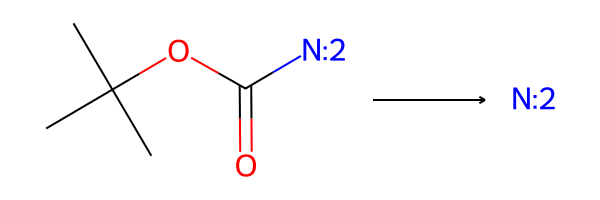

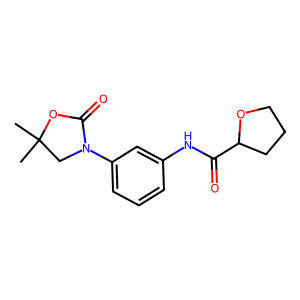

'No products'

()

In [5]:
# N boc deprotection
run_reaction(reaction_smarts['N-Boc_deprotection'], 'CC(C1)(C)OC(N1C2=CC=CC(NC(C3OCCC3)=O)=C2)=O')

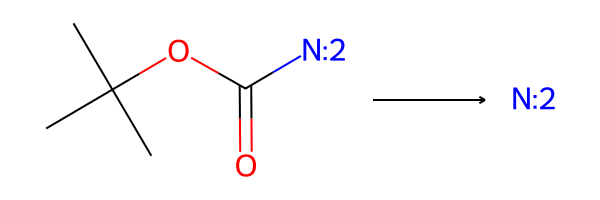

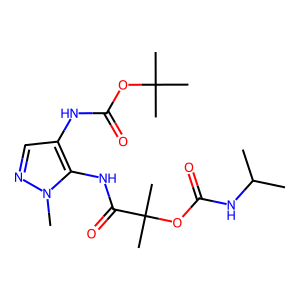

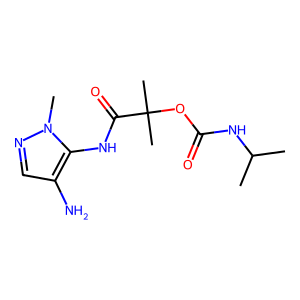

((<rdkit.Chem.rdchem.Mol at 0x1171f54d0>,),
 (<rdkit.Chem.rdchem.Mol at 0x1171f53f0>,),
 (<rdkit.Chem.rdchem.Mol at 0x1171f5000>,),
 (<rdkit.Chem.rdchem.Mol at 0x1171f5230>,),
 (<rdkit.Chem.rdchem.Mol at 0x1171f5540>,),
 (<rdkit.Chem.rdchem.Mol at 0x1171f55b0>,))

In [6]:
run_reaction(reaction_smarts['N-Boc_deprotection'], 'CC(C)NC(=O)OC(C)(C)C(=O)Nc1c(NC(=O)OC(C)(C)C)cnn1C')

In [7]:
products = how_many_products(reaction_smarts['N-Boc_deprotection'], 'CC(C)NC(=O)OC(C)(C)C(=O)Nc1c(NC(=O)OC(C)(C)C)cnn1C')
products = [product[0] for product in products]
for product in products:
    print(Chem.MolToSmiles(product))
    #display(Draw.MolToImage(product))

CC(C)NC(=O)OC(C)(C)C(=O)Nc1c(N)cnn1C
CC(C)NC(=O)OC(C)(C)C(=O)Nc1c(N)cnn1C
CC(C)NC(=O)OC(C)(C)C(=O)Nc1c(N)cnn1C
CC(C)NC(=O)OC(C)(C)C(=O)Nc1c(N)cnn1C
CC(C)NC(=O)OC(C)(C)C(=O)Nc1c(N)cnn1C
CC(C)NC(=O)OC(C)(C)C(=O)Nc1c(N)cnn1C


In [8]:
products = how_many_products(reaction_smarts['N-Boc_deprotection'], 'CC(C)NC(=O)OC(C)(C)C(=O)Nc1c(NC(=O)OC(C)(C)C)cnn1C')
products = [product[0] for product in products]
print(len(products))

6


In [9]:
unique_products = unique_molecules_by_inchi(products)
print(len(unique_products))

YPDOCTSSSLIGJA-UHFFFAOYSA-N
1


In [10]:
# %timeit unique_molecules_by_inchi(products)

# Benzyl_alcohol_deprotection

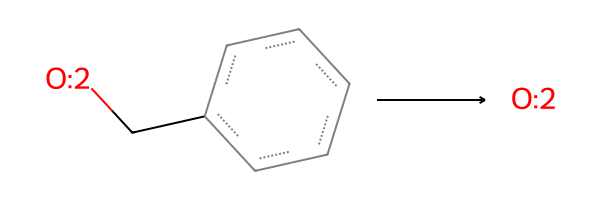

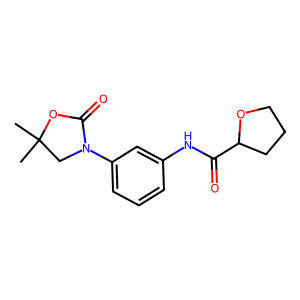

'No products'

()

In [11]:
run_reaction(reaction_smarts['Benzyl_alcohol_deprotection'], 'CC(C1)(C)OC(N1C2=CC=CC(NC(C3OCCC3)=O)=C2)=O')

# Atom numbers in amidation reactant smarts replacement check

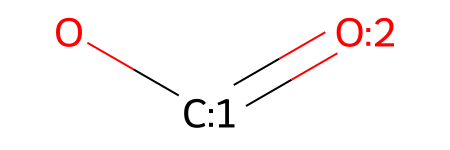

In [39]:
with open('/syndirella/constants/ADDITIONAL_RXN_OPTIONS.json') as f:
    reaction_smarts = json.load(f)
new_reactant_smarts = reaction_smarts[1]['reactant_smarts_to_replace_with']
to_replace_with: Chem.Mol = Chem.MolFromSmarts(new_reactant_smarts)
to_replace_with

In [40]:
to_replace: Chem.Mol = Chem.MolFromSmarts('[#6X3;!$(C-N)](=[OX1])[#17,#9,#35]')
to_replace_with: Chem.Mol = Chem.MolFromSmarts(new_reactant_smarts)
reactant_mol: Chem.Mol = Chem.MolFromSmiles('CC(=O)Cl')
replaced_reactant: Chem.Mol = Chem.ReplaceSubstructs(mol=reactant_mol,
                                                     query=to_replace,
                                                     replacement=to_replace_with,
                                                     replaceAll=False)

In [43]:
Chem.MolToSmiles(replaced_reactant[0])

'C[C:1](O)=[O:2]'

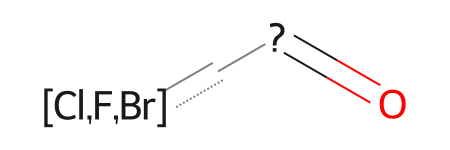

In [42]:
to_replace